In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/dell/Desktop/My_learning/DL_tutorial/day3/placement.csv")
df

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1
...,...,...,...
95,6.33,6.38,0
96,8.23,7.76,1
97,6.65,7.78,0
98,8.14,5.63,1


/home/dell/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa', ylabel='resume_score'>

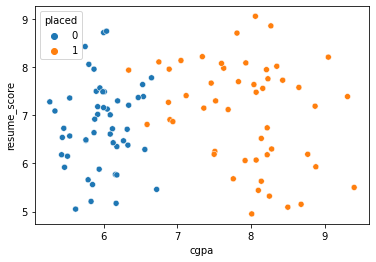

In [5]:
sns.scatterplot(df['cgpa'],df['resume_score'], hue = df['placed'])

In [6]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [9]:
p.fit(X,y)

Perceptron()

In [10]:
p.coef_

array([[ 40.26, -36.  ]])

In [11]:
p.intercept_

array([-25.])

<AxesSubplot:>

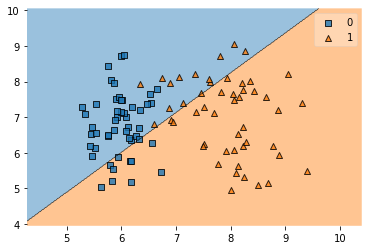

In [25]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf=p, legend=1)

In [31]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [32]:
print(y)

[1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1]


In [33]:
import matplotlib.pyplot as plt

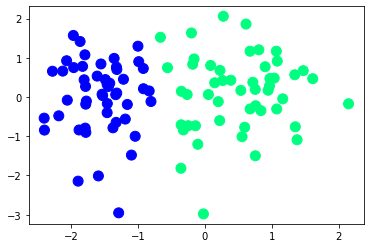

In [34]:
# plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [91]:
# def perceptron(X,y):
    
#     X = np.insert(X,0,1,axis=1)
#     weights = np.ones(X.shape[1])
#     lr = 0.1
    
#     for i in range(1000):
#         j = np.random.randint(0,100)
#         y_hat = step(np.dot(X[j],weights))
#         weights = weights + lr*(y[j]-y_hat)*X[j]
        
#     return weights[0],weights[1:]

In [92]:
def step(z):
    return 1 if z>0 else 0

In [93]:
intercept_,coef_ = perceptron(X,y)

IndexError: index 11 is out of bounds for axis 0 with size 10

In [41]:
print(intercept_,coef_)

1.0 [1.30882521 0.14626485]


In [42]:
# m = -(coef_[0]/coef_[1])
# b = -(intercept_/coef_[1])

In [43]:
# x_input = np.linspace(-3,3,100)
# y_input = m*x_input + b

(-3.0, 2.0)

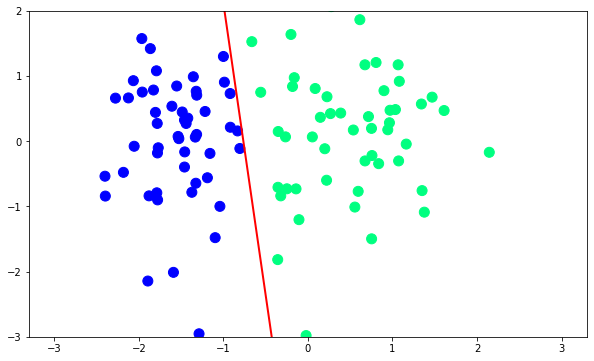

In [47]:
# plt.figure(figsize=(10,6))
# plt.plot(x_input,y_input,color='red',linewidth=2)
# plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
# plt.ylim(-3,2)

In [96]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [97]:
def perceptron(X,y):
    m = []
    b = []
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        m.append(-weights[1]/weights[2])
        b.append(-weights[0]/weights[2])
        
    return m , b

In [98]:
m,b = perceptron(X,y)

<IPython.core.display.Javascript object>


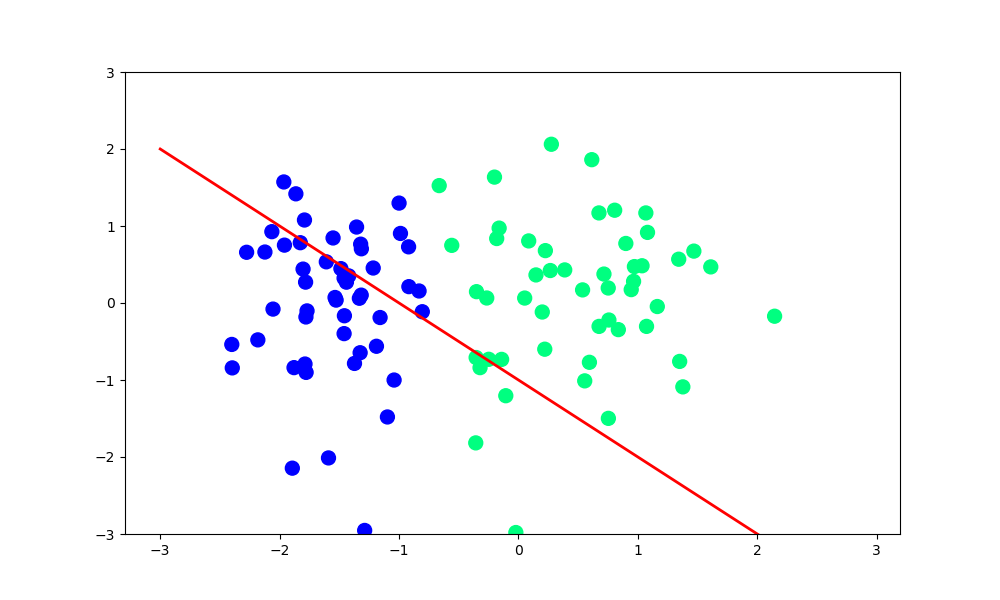

(-3.0, 3.0)

In [106]:
fig = plt.figure(figsize=(10,6))
# plt.plot(x_input,y_input,color='red',linewidth=2)
# plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
# plt.ylim(-3,2)
global x_i
global m,b

x_i = np.arange(-3,3,0.1)

ax = plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = plt.plot(x_i,x_i*m[0]+b[0],'-r',linewidth=2)
plt.ylim(-3,3)


In [109]:
def update(i):
    
    line.set_ydata(x_i,x_i*m[i]+b[i])
    return line,
    
anim = FuncAnimation(fig, func = update, repeat = True,frames = 200, interval =100,blit = True)


<IPython.core.display.Javascript object>


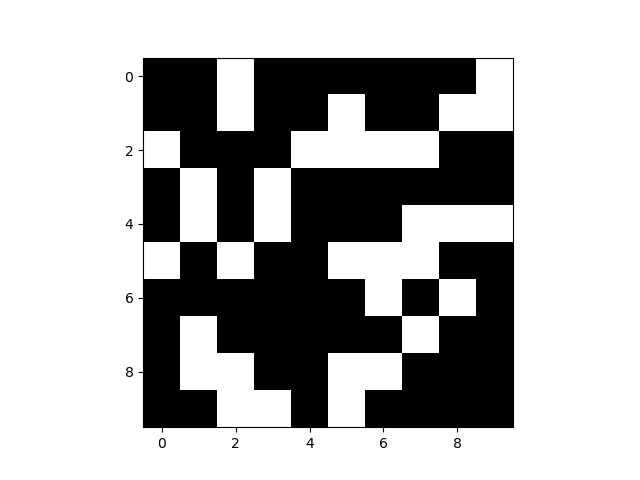

/home/dell/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


In [86]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def create_video(n):
    global X
    X = np.random.binomial(1, 0.3, size = (n, n))

    fig = plt.figure()
    im = plt.imshow(X, cmap = plt.cm.gray)

    def animate(t):
        global X
        X = np.roll(X, +1, axis = 0)
        im.set_array(X)
        return im, 

    anim = FuncAnimation(
        fig,
        animate,
        frames = 100,
        interval = 1000/30,
        blit = True
    )

    plt.show()

    return anim

anim = create_video(10)